# Results Analysis

## Imports

In [1]:
import os
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from utils.Transforms import mni_transform
from nilearn.plotting import plot_glass_brain

## Config

In [2]:
# All cell content
pd.set_option('display.max_colwidth', None)

## Load Data

In [3]:
models = ['AHNet', 'SegResNet', 'UNet', 'UNETR']

scores = {}
for model in os.listdir('outputs'):
    if model != 'gt_segs' and model != 'Ensemble':
        scores[model] = {}
        for files in os.listdir(f'outputs/{model}'):
            if files.endswith('metrics.csv'):
                scores[model]['train'] = pd.read_csv(f'outputs/{model}/{files}')
            if files.endswith('scores.csv'):
                scores[model]['test'] = pd.read_csv(f'outputs/{model}/{files}')

scores['Average'] = pd.read_csv('outputs/Ensemble/avg_test_scores.csv')
scores['Weighted Avg'] = pd.read_csv('outputs/Ensemble/weighted_avg_test_scores.csv')
scores['Majority Voting'] = pd.read_csv('outputs/Ensemble/majority_vote_test_scores.csv')

In [4]:
# AHNet Train
scores['AHNet']['train'].head()

,epoch,metric,metric_tc,metric_wt,metric_et,train_loss,val_loss
0,1,0.011330,0.010529,0.009402,0.015561,0.988528,0.990370
1,2,0.012389,0.017673,0.008977,0.011638,0.983636,0.989311
2,3,0.050840,0.126689,0.009666,0.017882,0.968726,0.980261
3,4,0.112131,0.314700,0.008216,0.014920,0.869503,0.968773
4,5,0.119791,0.334669,0.009167,0.017199,0.828164,0.964115


In [5]:
# AHNet Test
scores['AHNet']['test'].head()

,SubjectID,Dice,Dice TC,Dice WT,Dice ET,Pred NM TC,Pred NM WT,Pred NM ET,GT NM TC,GT NM WT,GT NM ET,Pred V TC,Pred V WT,Pred V ET,GT V TC,GT V WT,GT V ET,Pred Paths,GT Paths
0,100214B,0.459820,0.521787,0.526375,0.331299,11,6,9,16,16,2,1091,1060,842,722,722,305,"['outputs/AHNet/pred_segs/test_pred_segs/pred_100214B_TC.nii.gz', 'outputs/AHNet/pred_segs/test_pred_segs/pred_100214B_WT.nii.gz', 'outputs/AHNet/pred_segs/test_pred_segs/pred_100214B_ET.nii.gz']","['outputs/gt_segs/test_gt_segs/gt_100214B_TC.nii.gz', 'outputs/gt_segs/test_gt_segs/gt_100214B_WT.nii.gz', 'outputs/gt_segs/test_gt_segs/gt_100214B_ET.nii.gz']"
1,100340A,0.273040,0.298055,0.334430,0.186635,5,4,6,8,8,7,1038,1029,837,3847,4138,1692,"['outputs/AHNet/pred_segs/test_pred_segs/pred_100340A_TC.nii.gz', 'outputs/AHNet/pred_segs/test_pred_segs/pred_100340A_WT.nii.gz', 'outputs/AHNet/pred_segs/test_pred_segs/pred_100340A_ET.nii.gz']","['outputs/gt_segs/test_gt_segs/gt_100340A_TC.nii.gz', 'outputs/gt_segs/test_gt_segs/gt_100340A_WT.nii.gz', 'outputs/gt_segs/test_gt_segs/gt_100340A_ET.nii.gz']"
2,100391A,0.296876,0.312725,0.311971,0.265932,3,3,12,1,1,1,11908,11923,12022,2245,2245,1944,"['outputs/AHNet/pred_segs/test_pred_segs/pred_100391A_TC.nii.gz', 'outputs/AHNet/pred_segs/test_pred_segs/pred_100391A_WT.nii.gz', 'outputs/AHNet/pred_segs/test_pred_segs/pred_100391A_ET.nii.gz']","['outputs/gt_segs/test_gt_segs/gt_100391A_TC.nii.gz', 'outputs/gt_segs/test_gt_segs/gt_100391A_WT.nii.gz', 'outputs/gt_segs/test_gt_segs/gt_100391A_ET.nii.gz']"
3,100190B,0.664776,0.688608,0.689713,0.616008,1,1,1,2,2,2,491,492,472,694,694,515,"['outputs/AHNet/pred_segs/test_pred_segs/pred_100190B_TC.nii.gz', 'outputs/AHNet/pred_segs/test_pred_segs/pred_100190B_WT.nii.gz', 'outputs/AHNet/pred_segs/test_pred_segs/pred_100190B_ET.nii.gz']","['outputs/gt_segs/test_gt_segs/gt_100190B_TC.nii.gz', 'outputs/gt_segs/test_gt_segs/gt_100190B_WT.nii.gz', 'outputs/gt_segs/test_gt_segs/gt_100190B_ET.nii.gz']"
4,100142A,0.583799,0.621268,0.626341,0.503786,5,3,49,2,2,1,4106,4059,3191,2091,2091,1299,"['outputs/AHNet/pred_segs/test_pred_segs/pred_100142A_TC.nii.gz', 'outputs/AHNet/pred_segs/test_pred_segs/pred_100142A_WT.nii.gz', 'outputs/AHNet/pred_segs/test_pred_segs/pred_100142A_ET.nii.gz']","['outputs/gt_segs/test_gt_segs/gt_100142A_TC.nii.gz', 'outputs/gt_segs/test_gt_segs/gt_100142A_WT.nii.gz', 'outputs/gt_segs/test_gt_segs/gt_100142A_ET.nii.gz']"


In [6]:
# AVG Ensemble
scores['Average'].head()

,SubjectID,Dice,Dice TC,Dice WT,Dice ET,Pred NM TC,Pred NM WT,Pred NM ET,GT NM TC,GT NM WT,GT NM ET,Pred V TC,Pred V WT,Pred V ET,GT V TC,GT V WT,GT V ET
0,100214B,0.237404,0.280292,0.266543,0.165378,5,4,5,16,16,2,479,485,160,722,722,305
1,100340A,0.640889,0.725504,0.763857,0.433305,4,3,6,8,8,7,796,802,260,3847,4138,1692
2,100391A,0.240803,0.252542,0.252529,0.217337,1,1,2,1,1,1,146,159,22,2245,2245,1944
3,100190B,0.338231,0.368820,0.366818,0.279054,1,1,1,2,2,2,394,392,253,694,694,515
4,100142A,0.486244,0.530185,0.529292,0.399255,1,1,1,2,2,1,2803,2758,1553,2091,2091,1299


## Train & Val Loss

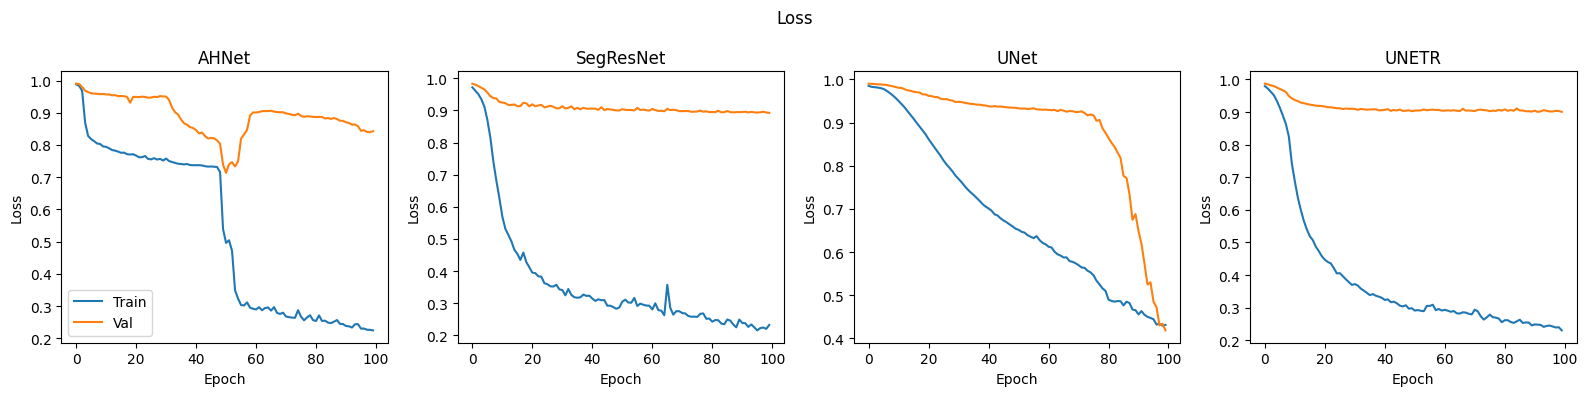

In [7]:
plt.figure(figsize=(16, 4))

for i, model in enumerate(scores.keys()):
	
    if model in models:
        # Load scores
        sc = scores[model]['train']

        # Plot
        plt.subplot(1, 4, i+1)
        plt.plot(sc["train_loss"], label='Train')
        plt.plot(sc["val_loss"], label='Val')
        plt.title(model)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        if i == 0:
            plt.legend()

plt.suptitle("Loss")
plt.tight_layout()
plt.show()

## Validation Dice Score

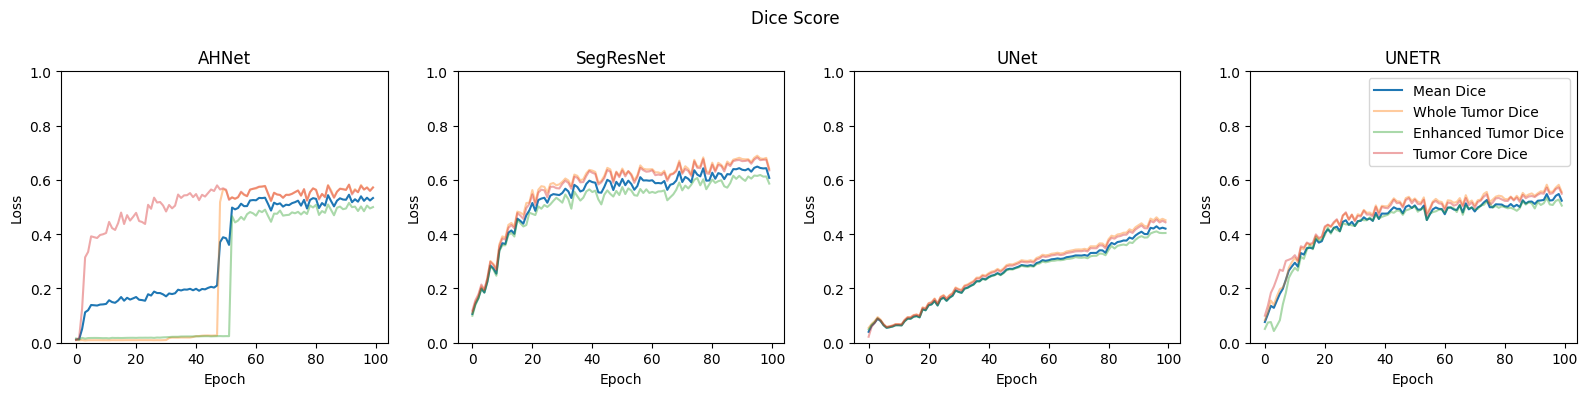

In [8]:
plt.figure(figsize=(16, 4))

for i, model in enumerate(scores.keys()):
	
    if model in models:
        # Load scores
        sc = scores[model]['train']

        # Plots
        plt.subplot(1, 4, i+1)
        plt.plot(sc["metric"], label='Mean Dice')
        plt.plot(sc["metric_wt"], label='Whole Tumor Dice', alpha=0.4)
        plt.plot(sc["metric_et"], label='Enhanced Tumor Dice', alpha=0.4)
        plt.plot(sc["metric_tc"], label='Tumor Core Dice', alpha=0.4)
        plt.title(model)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.ylim(0, 1)
        if i == 3:
            plt.legend()

plt.suptitle("Dice Score")
plt.tight_layout()
plt.show()

## Test Dice Score Analysis

### Mean Dice

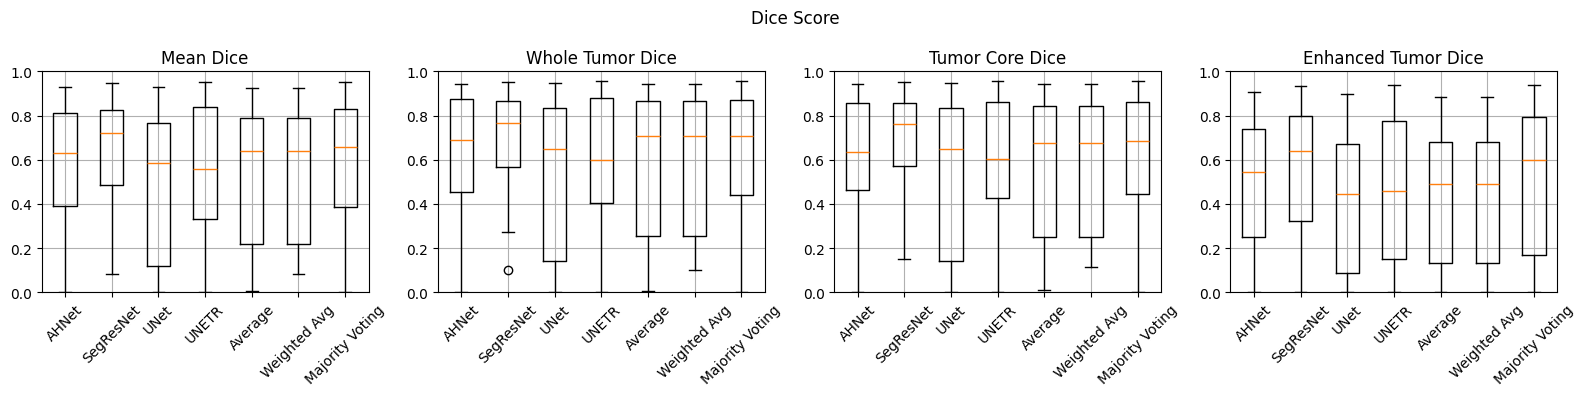

In [9]:
plt.figure(figsize=(16, 4))

mean, wt, tc, et = [], [], [], []
for i, model in enumerate(scores.keys()):
    
    # Load scores
    sc = None
    if model in models:
        sc = scores[model]['test']        
    else:
        sc = scores[model]
    
    # Append
    mean.append(sc["Dice"])
    wt.append(sc["Dice WT"])
    tc.append(sc["Dice TC"])
    et.append(sc["Dice ET"])

plt.subplot(1, 4, 1)
plt.boxplot(mean, labels=scores.keys())
plt.xticks(rotation=45)
plt.title("Mean Dice")
plt.ylim(0, 1)
plt.grid()

plt.subplot(1, 4, 2)
plt.boxplot(wt, labels=scores.keys())
plt.xticks(rotation=45)
plt.title("Whole Tumor Dice")
plt.ylim(0, 1)	
plt.grid()

plt.subplot(1, 4, 3)
plt.boxplot(tc, labels=scores.keys())
plt.xticks(rotation=45)
plt.title("Tumor Core Dice")
plt.ylim(0, 1)
plt.grid()

plt.subplot(1, 4, 4)
plt.boxplot(et, labels=scores.keys())
plt.xticks(rotation=45)
plt.title("Enhanced Tumor Dice")
plt.ylim(0, 1)
plt.grid()

plt.suptitle("Dice Score")
plt.tight_layout()
plt.show()

### TC, WT, ET Dice

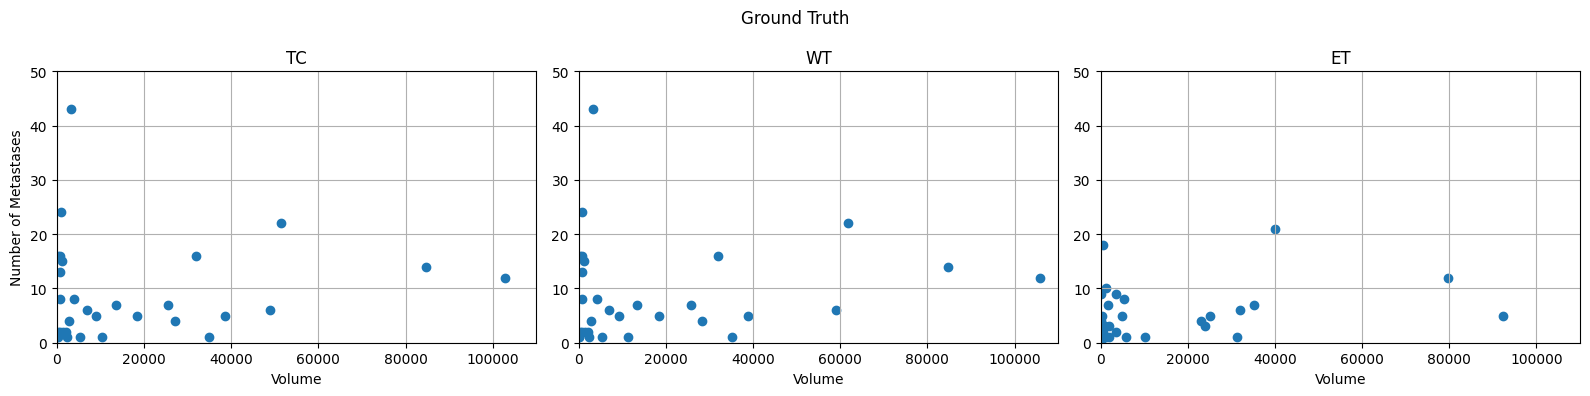

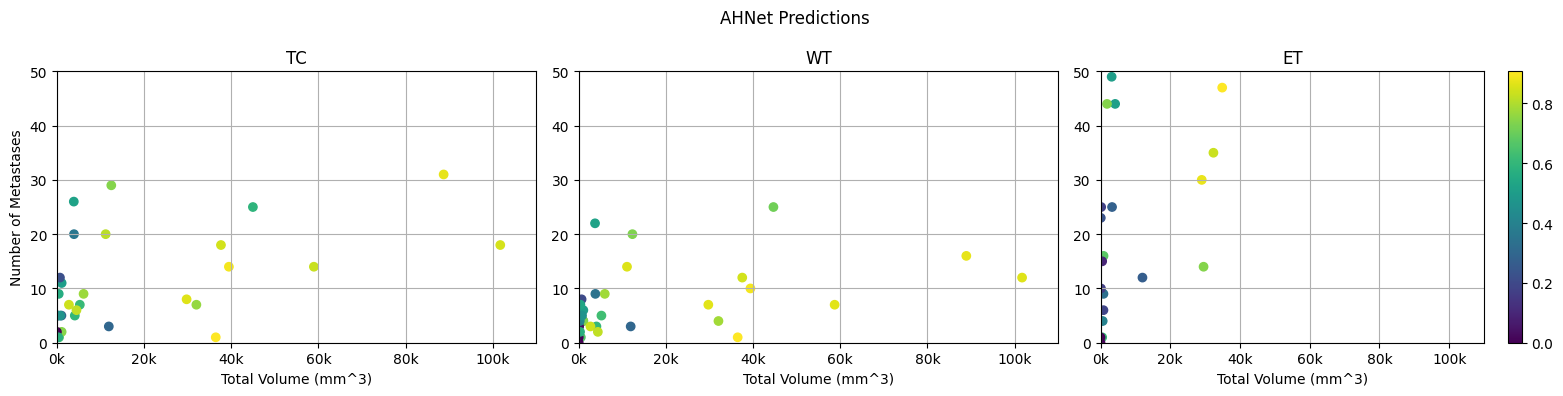

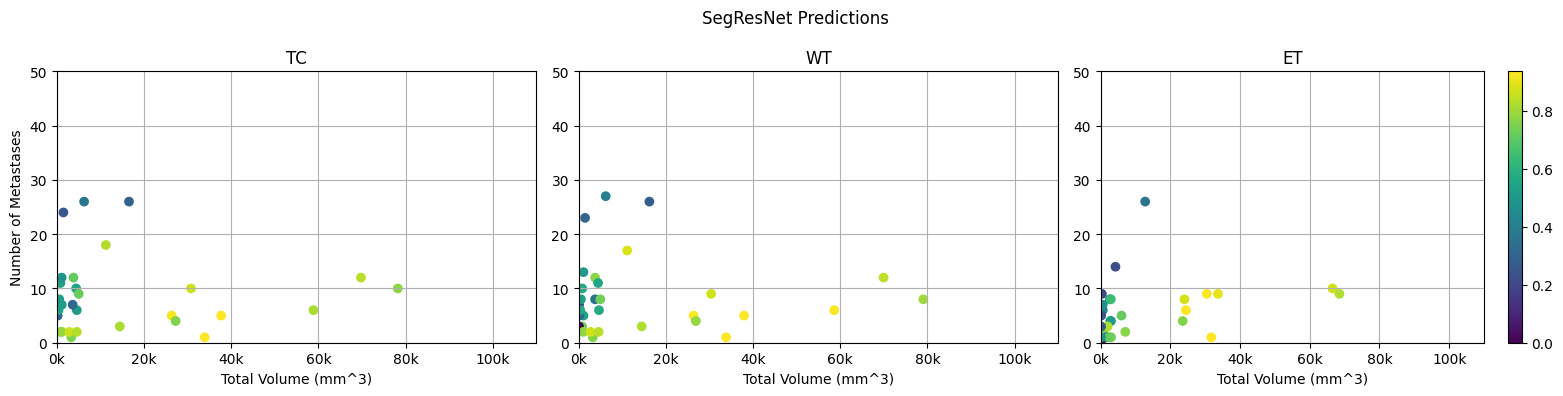

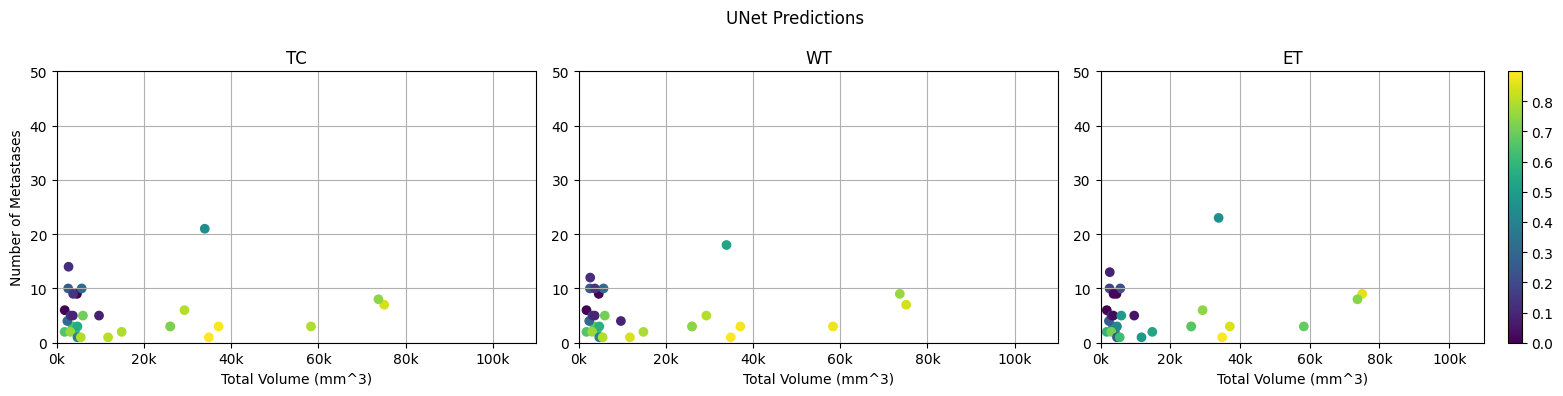

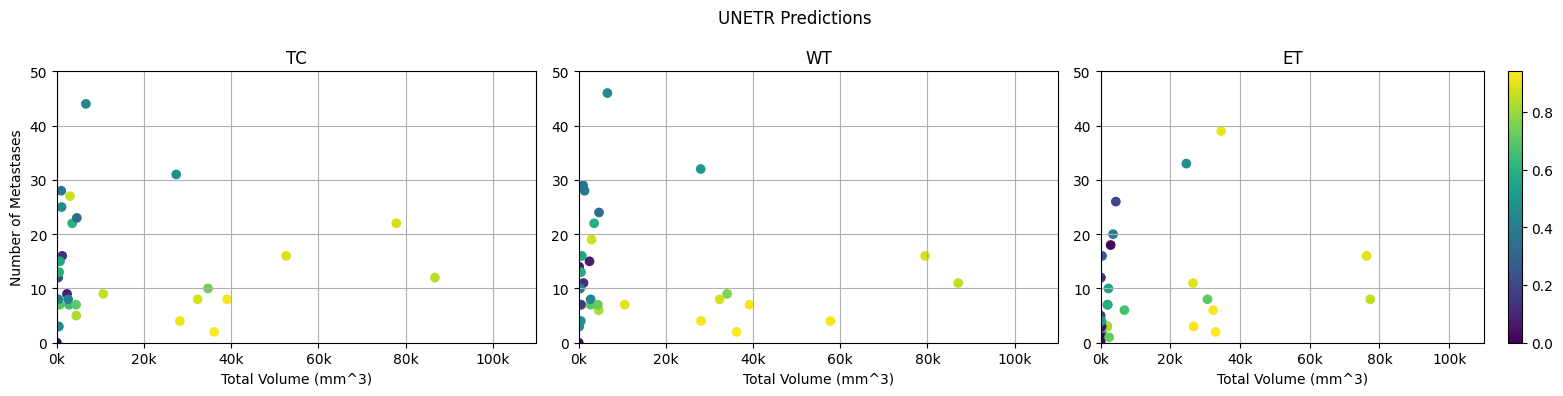

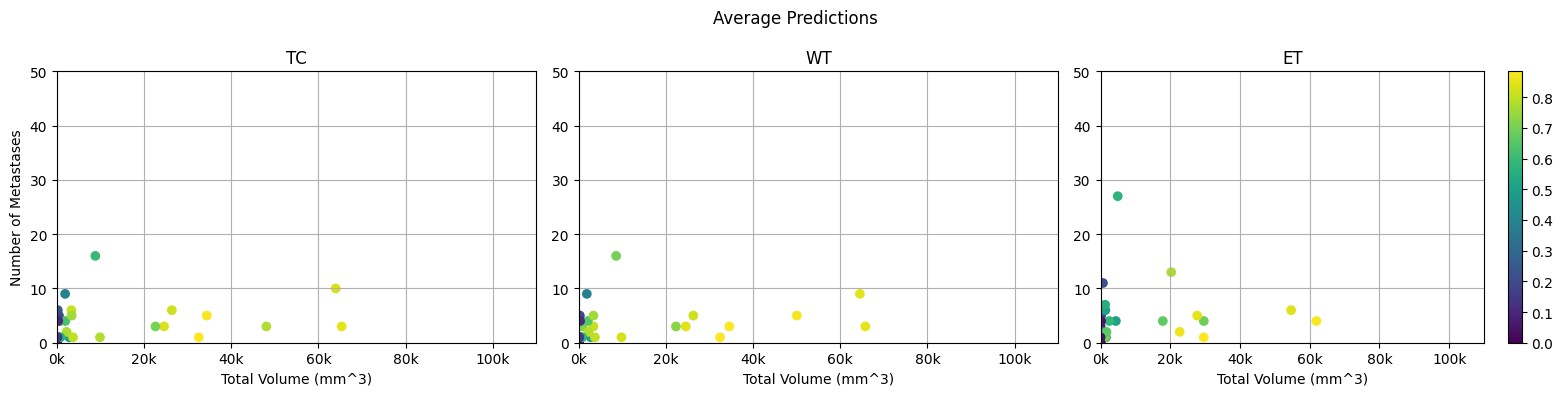

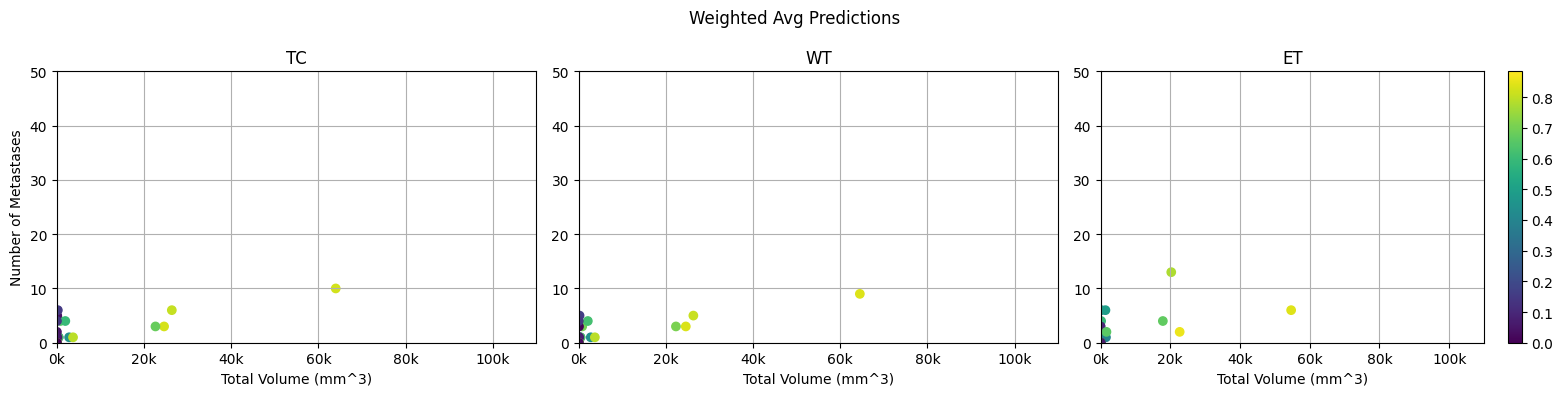

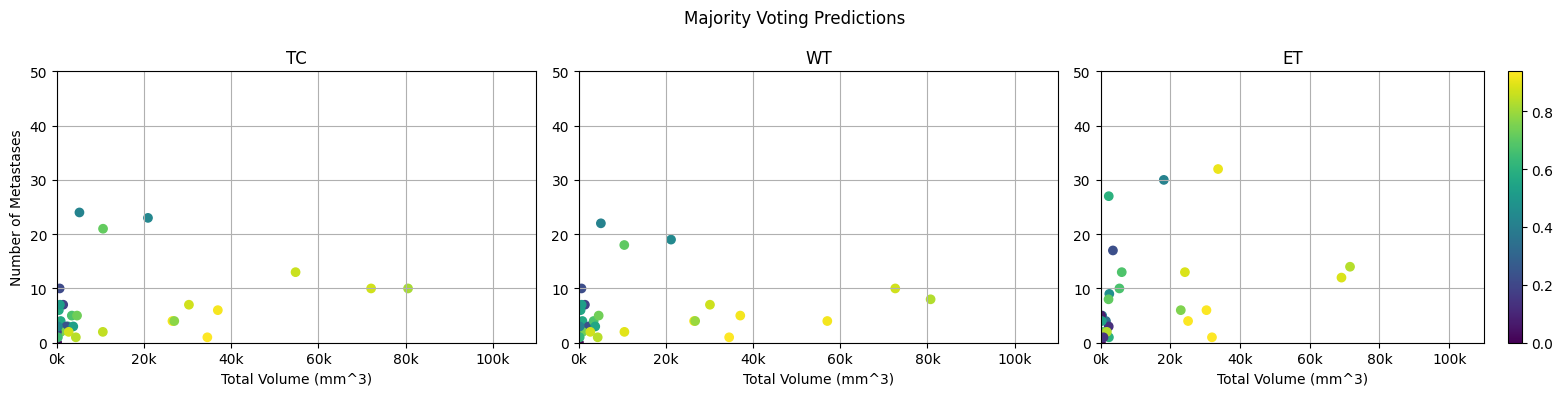

In [10]:
# Scatter Based on NM and V
channels = ['TC', 'WT', 'ET']

# GT 
plt.figure(figsize=(16, 4))
for i, channel in enumerate(channels):
    plt.subplot(1, 3, i+1)
    plt.scatter(scores['AHNet']['test'][f'GT V {channel}'], scores['AHNet']['test'][f'GT NM {channel}'])
    plt.title(channel)
    plt.xlabel("Volume")
    if i == 0:
        plt.ylabel("Number of Metastases")
    plt.xlim(0, 110000)
    plt.ylim(0, 50)
    plt.grid()
plt.suptitle("Ground Truth")
plt.tight_layout()
plt.show()

# Predicted
for model in scores.keys():
    plt.figure(figsize=(16, 4))
    for i, channel in enumerate(channels):
        plt.subplot(1, 3, i+1)
        if model in models:
            plt.scatter(scores[model]['test'][f'Pred V {channel}'], scores[model]['test'][f'Pred NM {channel}'], c=scores[model]['test'][f'Dice {channel}'])
        else:
            plt.scatter(scores[model][f'Pred V {channel}'], scores[model][f'Pred NM {channel}'], c=scores[model][f'Dice {channel}'])
        plt.title(channel)
        plt.xlabel("Total Volume (mm^3)")
        plt.xlim(0, 110000)
        plt.ylim(0, 50)
        plt.xticks([0, 20000, 40000, 60000, 80000, 100000], 
           ['{}k'.format(int(x/1000)) for x in [0, 20000, 40000, 60000, 80000, 100000]])
        plt.grid()
        if i == 0:
            plt.ylabel("Number of Metastases")
        if i == 2:
            plt.colorbar()
    plt.suptitle(f"{model} Predictions")
    plt.tight_layout()
    plt.show()

## Crystal Brain Plots

NameError: name 'worst_images' is not defined

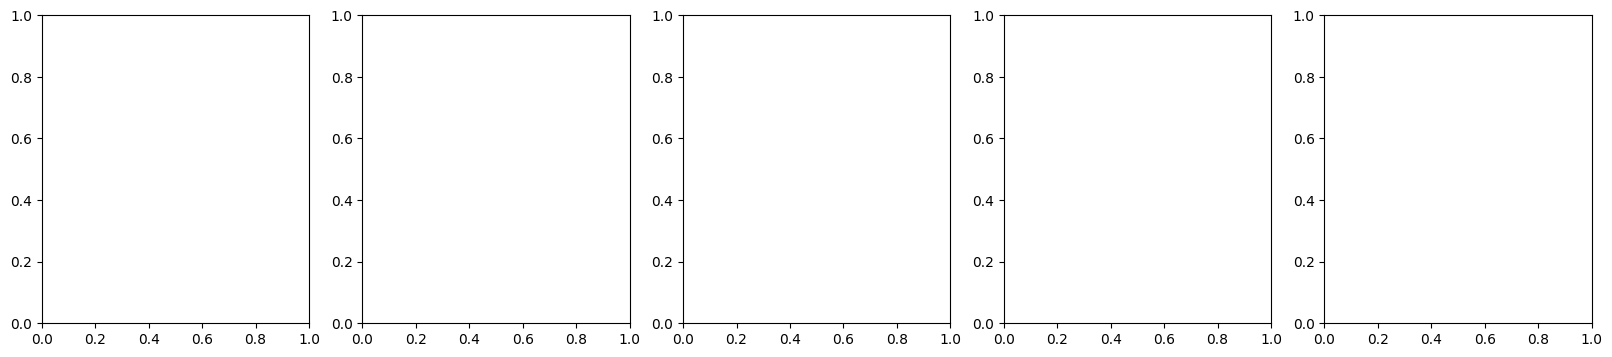

In [11]:
# Plot
for i, channel in enumerate(channels):
	fig, axes = plt.subplots(1, 5, figsize=(20, 4))
	for j, model in enumerate(worst_images.keys()):
		if model == 'GT':
			plot_glass_brain(worst_images[model][i], axes=axes[j], title=f"{model}", display_mode='z')
		else:
			score = scores[model]['test'][scores[model]['test']['SubjectID'] == wrost_pred][f'Dice {channel}'].values[0]
			plot_glass_brain(worst_images[model][i], axes=axes[j], title=f"{model} - Dice: {score:.2f}", display_mode='z')
	plt.suptitle(f"Worst Mean Dice - {channel} - {wrost_pred}", fontsize=20)
	plt.show()